### Goal:
#### Predict a given customer will opt for which membership or subscription plan

- I am using KNN to predict the classification
- This basically does calcualate distance between all the data points
- let say k = 5 and three of them suggests one class majority voting wins

In [84]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
cust_df = pd.read_csv("./datasets/teleCust1000t.csv")
cust_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [86]:
print(f"Shape of data: {cust_df.shape}")
# print(f"{cust_df.info()}")
cust_df.info()
y = cust_df["custcat"].values
print(y[0:5])
print(cust_df["custcat"].value_counts())
print(cust_df.columns)
cust_df.describe()

Shape of data: (1000, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   region   1000 non-null   int64  
 1   tenure   1000 non-null   int64  
 2   age      1000 non-null   int64  
 3   marital  1000 non-null   int64  
 4   address  1000 non-null   int64  
 5   income   1000 non-null   float64
 6   ed       1000 non-null   int64  
 7   employ   1000 non-null   int64  
 8   retire   1000 non-null   float64
 9   gender   1000 non-null   int64  
 10  reside   1000 non-null   int64  
 11  custcat  1000 non-null   int64  
dtypes: float64(2), int64(10)
memory usage: 93.9 KB
[1 4 3 1 3]
custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64
Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,0.495000,11.551000,77.535000,2.671000,10.987000,0.047000,0.517000,2.331000,2.487000
std,0.8162,21.359812,12.558816,0.500225,10.086681,107.044165,1.222397,10.082087,0.211745,0.499961,1.435793,1.120306
min,1.0000,1.000000,18.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,1.0000,17.000000,32.000000,0.000000,3.000000,29.000000,2.000000,3.000000,0.000000,0.000000,1.000000,1.000000
50%,2.0000,34.000000,40.000000,0.000000,9.000000,47.000000,3.000000,8.000000,0.000000,1.000000,2.000000,3.000000
75%,3.0000,54.000000,51.000000,1.000000,18.000000,83.000000,4.000000,17.000000,0.000000,1.000000,3.000000,3.000000
max,3.0000,72.000000,77.000000,1.000000,55.000000,1668.000000,5.000000,47.000000,1.000000,1.000000,8.000000,4.000000


array([[<Axes: title={'center': 'income'}>]], dtype=object)

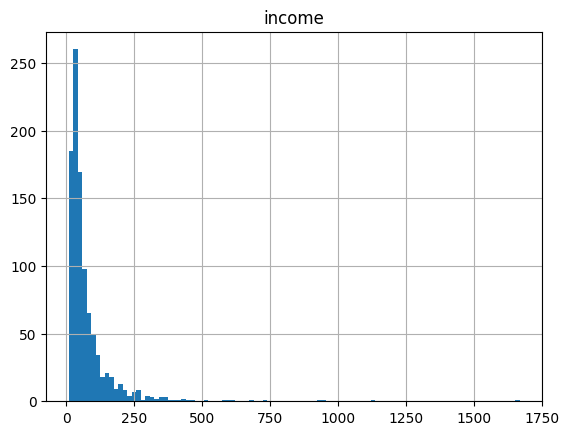

In [87]:
cust_df.hist(column="income", bins=100)

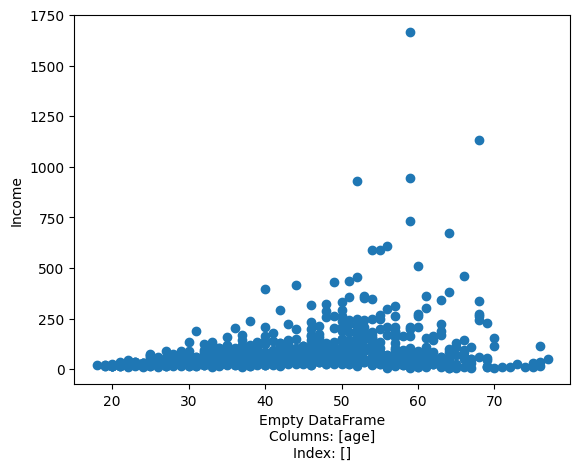

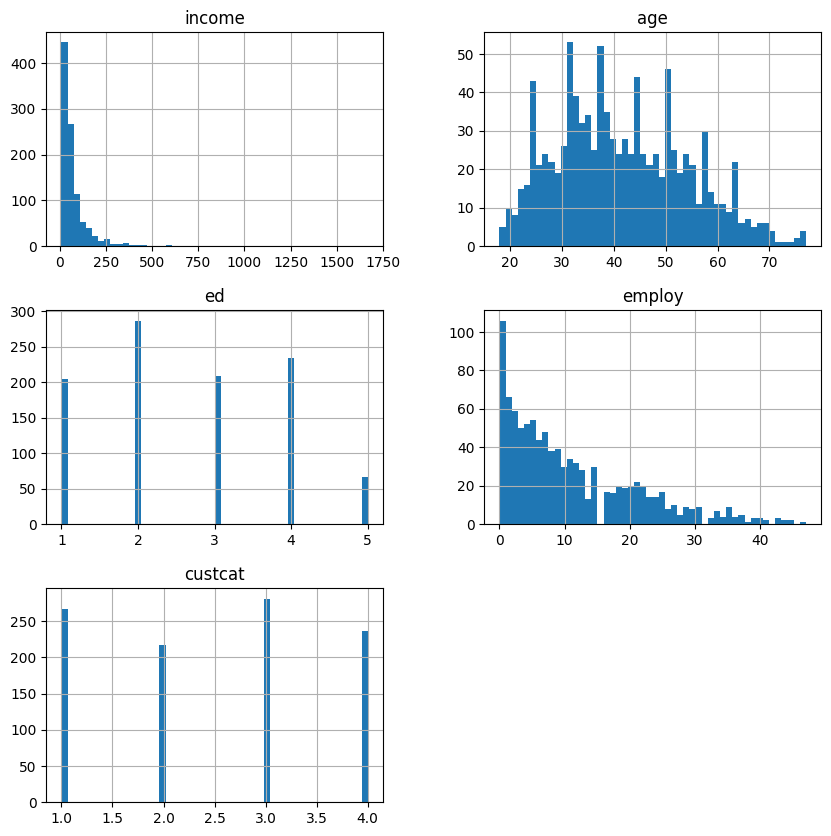

In [88]:
x = cust_df[["age"]]
y = cust_df[["income"]]

# Scatter plot of the data
plt.scatter(x, y)
plt.xlabel(x[1:0])
plt.ylabel("Income")

# Plotting histogram of the data
vis = cust_df.hist(column=["income", "age", "ed", "employ", "custcat"], bins=50, figsize=(10, 10))  
plt.show()

### Normal distribution function / Probablity density function
$$
f(x) = \frac{1}{\sigma\sqrt{2\pi}}
e^{- \frac{(x - \mu)^2}{2\sigma^2}}
$$

<Axes: ylabel='Density'>

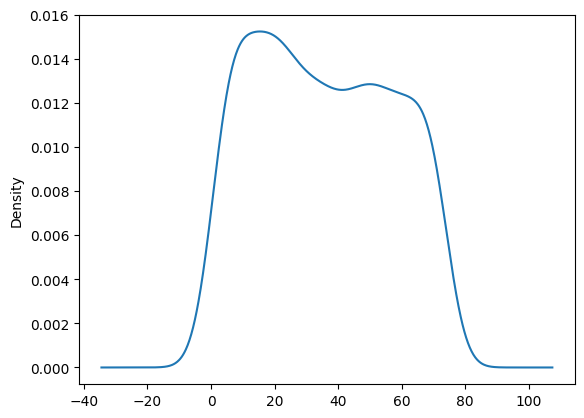

In [89]:
# Plotting the Bull curve to see the distribution of the data
# Kernel density estimation
cust_df["tenure"].plot(kind="kde")


Mean: 10.987, Standard deviation: 10.08208705970542
[-19.25926118 -18.6482256  -18.03719002 -17.42615444 -16.81511886
 -16.20408328 -15.5930477  -14.98201212 -14.37097654 -13.75994096
 -13.14890539 -12.53786981 -11.92683423 -11.31579865 -10.70476307
 -10.09372749  -9.48269191  -8.87165633  -8.26062075  -7.64958517
  -7.03854959  -6.42751401  -5.81647843  -5.20544285  -4.59440727
  -3.98337169  -3.37233612  -2.76130054  -2.15026496  -1.53922938
  -0.9281938   -0.31715822   0.29387736   0.90491294   1.51594852
   2.1269841    2.73801968   3.34905526   3.96009084   4.57112642
   5.182162     5.79319758   6.40423315   7.01526873   7.62630431
   8.23733989   8.84837547   9.45941105  10.07044663  10.68148221
  11.29251779  11.90355337  12.51458895  13.12562453  13.73666011
  14.34769569  14.95873127  15.56976685  16.18080242  16.791838
  17.40287358  18.01390916  18.62494474  19.23598032  19.8470159
  20.45805148  21.06908706  21.68012264  22.29115822  22.9021938
  23.51322938  24.12426496  

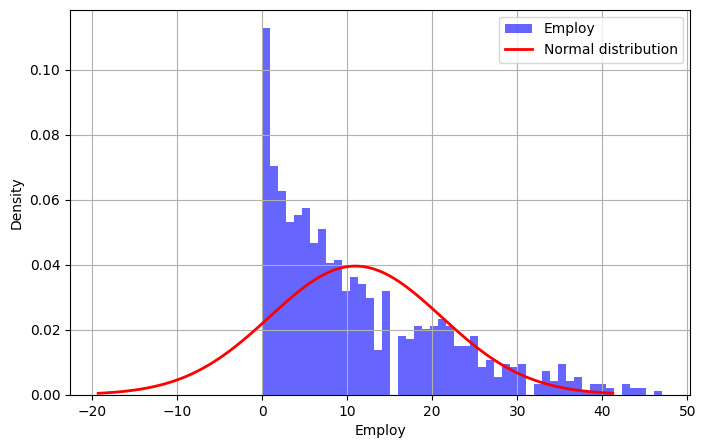

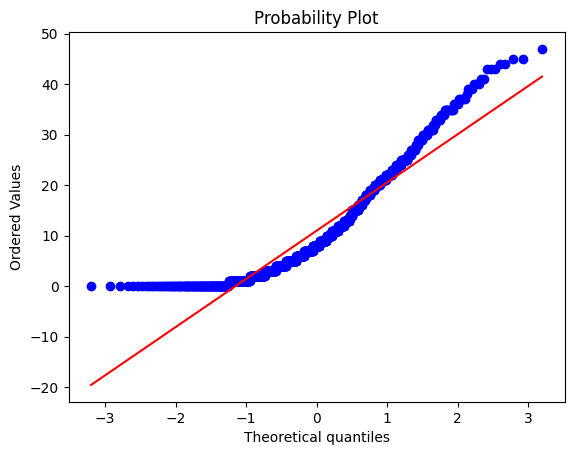

In [90]:
# plotting Normal distribution curve
from scipy.stats import norm, probplot

mean = cust_df["employ"].mean()
std = cust_df["employ"].std()
print(f"Mean: {mean}, Standard deviation: {std}")

# probability distribution of the data 
plt.figure(figsize=(8, 5))
plt.hist(cust_df["employ"], bins=50, density=True, alpha=0.6, color="blue", label="Employ")

# Plotting the Normal distribution curve
x = np.linspace(mean - 3*std, mean + 3*std, 100)
print(x)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, "r-", lw=2, label="Normal distribution")
plt.xlabel("Employ")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

# QQ plot
probplot(cust_df["employ"], dist="norm", plot=plt)
plt.show()

Mean: 41.684, Standard deviation: 10.08208705970542


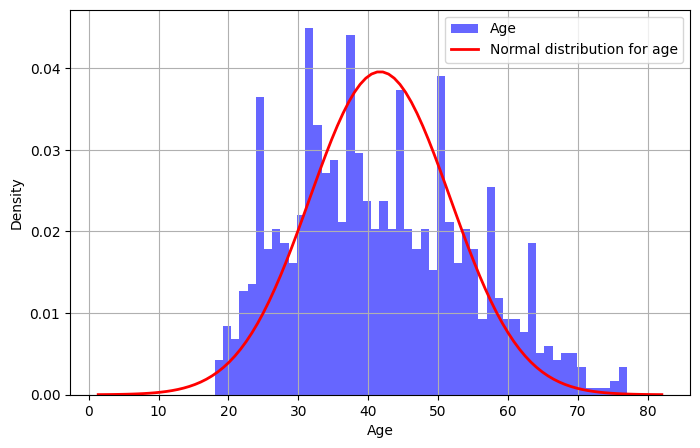

In [91]:
# historgram plot for column age
# cust_df.hist(column="age", bins=50, figsize=(8, 5))
plt.figure(figsize=(8, 5))
plt.hist(cust_df["age"], bins=50, density=True, alpha=0.6, color="blue", label="Age")

# Plotting the Normal distribution curve for age
mean = cust_df["age"].mean()
std - cust_df["age"].std()
print(f"Mean: {mean}, Standard deviation: {std}")

x = np.linspace(mean - 4 * std, mean + 4 * std, 100)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, "r-", lw=2, label="Normal distribution for age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [92]:
cust_df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [93]:
# Train and test split
x = cust_df[["region", "tenure", "age", "marital", "address", "income", "ed", "employ", "retire", "gender", "reside"]]
y = cust_df["custcat"]  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Normalizing the data to avoid stupid local minima
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
print(x_scaled)
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)
print(f"x_train shape: {x_train.shape}, x_test shape: {x_test.shape}, y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")


[[-0.02696767 -1.055125    0.18450456 ... -0.22207644 -1.03459817
  -0.23065004]
 [ 1.19883553 -1.14880563 -0.69181243 ... -0.22207644 -1.03459817
   2.55666158]
 [ 1.19883553  1.52109247  0.82182601 ... -0.22207644  0.96655883
  -0.23065004]
 ...
 [ 1.19883553  1.47425216  1.37948227 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  1.61477311  0.58283046 ... -0.22207644  0.96655883
  -0.92747794]
 [ 1.19883553  0.67796676 -0.45281689 ... -0.22207644  0.96655883
   0.46617787]]
x_train shape: (800, 11), x_test shape: (200, 11), y_train shape: (800,), y_test shape: (200,)


In [94]:
from sklearn.neighbors import KNeighborsClassifier

k = 6
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
y_pred

array([4, 2, 3, 3, 3, 3, 4, 3, 1, 4, 2, 1, 4, 3, 1, 1, 4, 1, 1, 3, 1, 1,
       1, 3, 3, 3, 2, 1, 4, 4, 1, 1, 3, 1, 3, 2, 1, 1, 1, 4, 3, 1, 1, 3,
       1, 3, 1, 3, 1, 1, 1, 2, 1, 1, 3, 1, 3, 1, 1, 1, 1, 2, 1, 2, 1, 2,
       1, 1, 1, 1, 3, 3, 3, 3, 2, 1, 3, 3, 3, 1, 4, 1, 2, 2, 1, 3, 1, 4,
       2, 2, 4, 3, 4, 1, 3, 2, 2, 1, 4, 1, 1, 3, 1, 2, 2, 1, 1, 3, 1, 4,
       2, 1, 1, 3, 1, 1, 3, 1, 2, 4, 3, 3, 3, 3, 4, 2, 3, 2, 1, 1, 1, 4,
       1, 1, 4, 2, 3, 2, 1, 1, 4, 2, 1, 4, 1, 4, 2, 3, 1, 3, 1, 4, 3, 2,
       3, 1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 4, 1, 3, 4, 3, 1, 3,
       4, 1, 1, 1, 1, 3, 4, 1, 1, 4, 2, 2, 3, 1, 2, 1, 1, 2, 1, 1, 1, 4,
       2, 3])

In [95]:
# Model evaluation

from sklearn import metrics
print(f"Train set Accuracy: {metrics.accuracy_score(y_train, knn.predict(x_train))}")
print(f"Test set accuracy: {metrics.accuracy_score(y_test, y_pred)}")

Train set Accuracy: 0.5075
Test set accuracy: 0.33


In [110]:
# finding out which value of k has the maximum result

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
print(mean_acc)
print(std_acc)
ConfustionMx = []

for i in range(1, Ks):
    # Train and Predict and evaluate
    knn = KNeighborsClassifier(n_neighbors= i).fit(x_train, y_train)
    y_hat = knn.predict(x_test)
    mean_acc[i - 1] = metrics.accuracy_score(y_test, y_hat)
    std_acc[i - 1] = np.std(y_hat == y_test)/np.sqrt(y_hat.shape[0])
mean_acc
 

[0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]


array([0.29 , 0.34 , 0.365, 0.325, 0.33 , 0.33 , 0.33 , 0.335, 0.33 ])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


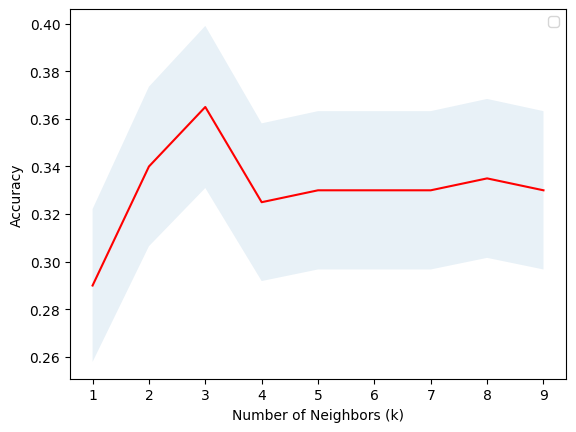

In [113]:
plt.plot(range(1, Ks), mean_acc, 'r')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (k)")
plt.show()

In [120]:
print(f"The accuracy is {mean_acc.max()}, k =  {mean_acc.argmax() + 1}")
mean_acc.argmax() + 1

The accuracy is 0.365, k =  3


3

In [121]:
# Summary
# Learned how to play more with data using dataframe
# Learned how to plot more plots like Bell curve, hist, scatter plots, Probabplot
# Learned Normal Distribution, Kerner density estimation
# Normalize the data, Train test split
# Train, Test the model using scikit learn
# Evaluate the model and choose the best k for the job
# Learned making prediction with K - Nearest neighbors


In [122]:
print("The End!")

The End!
